# Case Study on Measures of Central Tendency and Dispersion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset, thereby creating the DataFrame
data = pd.read_csv('StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [3]:
# Cleaning the dataset: Checking out the null values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### 1. Number of Males & Females participated in the test

In [4]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [5]:
print("The number of males participated in the test is",data['gender'].value_counts()['male'],".")

The number of males participated in the test is 482 .


In [6]:
print("The number of females participated in the test is",data['gender'].value_counts()['female'],".")

The number of females participated in the test is 518 .


Text(0, 0.5, 'Number of persons')

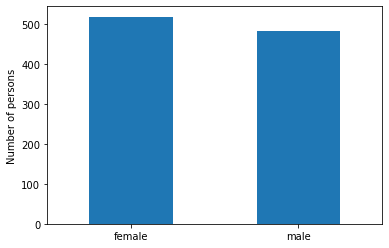

In [7]:
data['gender'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of persons')

### 2. Students' Parental Level of Education

In [8]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

Text(0.5, 0, 'Total number of parents')

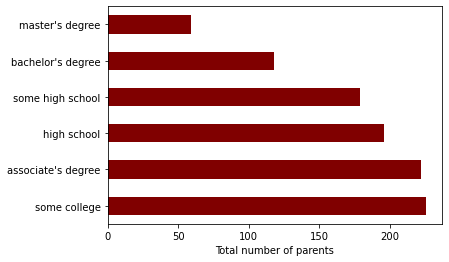

In [9]:
data['parental level of education'].value_counts().plot.barh(color='maroon')
plt.xlabel('Total number of parents')

Out of 1000 parents, 375 parents have only high school level education, 177 have proper college education, i.e., either bachelor's degree or master's degree, 226 have some college education and 222 have an associate's degree.

### 3. Better Performers on Examinations

In [10]:
# Based on Gender
avg_scr = data[['gender','math score','reading score','writing score']].groupby('gender').mean()
avg_scr

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


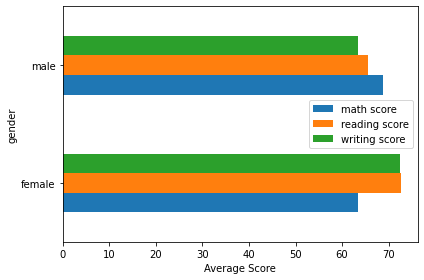

In [11]:
avg_scr.plot.barh()
plt.xlabel('Average Score')
plt.tight_layout()

It can be seen that the female students scores the most on average for reading and writing; meanwhile, the male students scores the most on average for maths.

In [12]:
# Based on Test Preparation Course
avg_scr1 = data[['test preparation course','math score','reading score','writing score']].groupby('test preparation course').mean()
avg_scr1

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


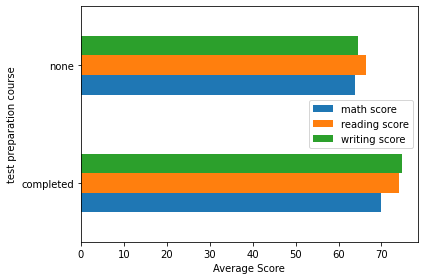

In [13]:
avg_scr1.plot.barh()
plt.xlabel('Average Score')
plt.tight_layout()

Based on the test preparation course, the students who had completed the course, have scored better in all the three skills than those who hadnt completed the course.

### 4. Variation in scores for different skills

In [14]:
# Based on Gender
data[['gender','math score','reading score','writing score']].groupby('gender').var()

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


It can been seen that the scores of female students varied more from the mean than the scores of the male students.

In [15]:
# Based of Test Preparation Course
data[['test preparation course','math score','reading score','writing score']].groupby('test preparation course').var()

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


Here, the scores of the students who had taken the test preparation course varied less from the mean than the scores of the students who hadnt taken the course.

### 5. Top scorers in Maths

In [16]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


As described by the descriptive statistics, the score of the 75 percentile students is 77, i.e., all the persons who scored above 77 should be included in the Top 25%.

In [17]:
data[data['math score'] > data['math score'].quantile(0.75)].sort_values(by='math score',ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
998,male,group E,associate's degree,free/reduced,completed,100,100,93
997,male,group D,some college,standard,completed,100,97,99
996,male,group A,some college,standard,completed,100,96,86
...,...,...,...,...,...,...,...,...
862,male,group D,high school,free/reduced,completed,78,77,80
863,male,group D,some high school,standard,completed,78,81,86
865,male,group E,associate's degree,free/reduced,completed,78,74,72
431,female,group B,bachelor's degree,free/reduced,none,78,79,76


This is the list of the Top 25% of the students based on their Maths score.